## Touch and User Classification from Smart Fabric


### DEFNE TURĞUT 221805084

### DATA ANALYSE

In [1]:
import pandas as pd
import numpy as np

In [2]:
#exceldeki veriyi oku
data = pd.read_excel("03-Touch and User Classification from Smart Fabric.xlsx")
data.head(10)

,user_id,touch_type,touch,finger,palm,fist,1,2,3,4,...,3191,3192,3193,3194,3195,3196,3197,3198,3199,3200
0,0,0,False,False,False,False,4,0,12,-16,...,-51,4,1,3,-42,2,3,61,2,-1
1,0,0,False,False,False,False,-52,-2,17,1,...,-36,-1,49,6,-58,8,49,63,47,6
2,0,0,False,False,False,False,2,7,14,-5,...,1,55,54,-51,-26,55,56,9,55,52
3,0,0,False,False,False,False,0,6,10,8,...,1,2,28,2,1,9,55,53,-7,51
4,0,0,False,False,False,False,2,5,3,0,...,-25,51,-6,-45,-4,61,48,60,46,5
5,0,0,False,False,False,False,1,10,14,-8,...,-52,45,10,-50,-51,65,2,2,44,0
6,0,0,False,False,False,False,-51,-1,8,-1,...,-52,46,53,-51,-52,54,55,54,55,52
7,0,0,False,False,False,False,6,5,14,-8,...,-52,46,51,-52,-52,54,55,54,55,53
8,0,0,False,False,False,False,1,0,16,6,...,-17,-7,0,11,0,0,45,2,1,50
9,0,0,False,False,False,False,5,6,21,-7,...,1,19,1,2,0,1,2,0,1,-2


In [3]:
#dataset genel bilgileri yazdır
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Columns: 3206 entries, user_id to 3200
dtypes: bool(4), int64(3202)
memory usage: 50.2 MB


In [4]:
#dataset satır ve sütun sayısı yazdır
data.shape

(2056, 3206)

In [5]:
#ilk 20 sütun ismini listele
print(data.columns.tolist()[:20]) 

['user_id', 'touch_type', 'touch', 'finger', 'palm', 'fist', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [6]:
pd.set_option("display.max_rows", None)  # Tüm satırları göstermek için
pd.set_option("display.max_columns", None)  # Tüm sütunları göstermek için 
#Her sütundaki null değer sayısını yazdır
print("Eksik değerler:")
data.isnull().sum().sort_values(ascending=False)

Eksik değerler:


3200          0
user_id       0
touch_type    0
touch         0
finger        0
palm          0
3184          0
3183          0
3182          0
3181          0
3180          0
3179          0
3178          0
3177          0
3176          0
3175          0
3174          0
3173          0
3172          0
3171          0
3170          0
3169          0
32            0
31            0
30            0
29            0
28            0
27            0
26            0
25            0
24            0
23            0
22            0
21            0
20            0
19            0
18            0
17            0
48            0
47            0
46            0
45            0
44            0
43            0
42            0
41            0
40            0
39            0
38            0
37            0
36            0
35            0
34            0
33            0
64            0
63            0
62            0
61            0
60            0
59            0
58            0
57            0
56      

In [7]:
# 0 içeren sütunları yazdır
zero_values = (data == 0).sum()
print("Sıfır Değerler:\n", zero_values[zero_values > 0].sort_values(ascending=False))

Sıfır Değerler:
 finger        1796
fist          1742
palm          1718
touch_type    1144
touch         1144
123            478
1123           466
126            463
1723           441
323            440
526            414
129            412
1126           411
326            408
125            408
726            403
523            402
1726           397
723            392
127            390
1923           387
727            379
724            378
923            375
1926           365
325            365
124            362
525            361
1127           356
1124           350
3123           347
1125           346
114            345
131            343
725            341
329            341
1129           337
514            336
924            335
1724           331
331            331
731            328
1725           325
1925           321
3131           318
2323           317
1931           317
511            311
1130           310
729            310
2523           309
3121          

In [ ]:
#veri setinin sayısal sütunlarının istatistik bilgilerini incele
data.describe()

user_id   touch_type            1            2            3  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean     14.144455     2.208658     6.383268    -0.736868    -1.372568   
std       8.776936     3.059943    37.765997     7.140939     8.932638   
min       0.000000     0.000000   -62.000000   -22.000000   -23.000000   
25%       7.000000     0.000000    -2.000000    -6.000000    -8.000000   
50%      14.000000     0.000000     3.000000    -1.000000    -1.000000   
75%      22.000000     4.000000    53.000000     5.000000     4.000000   
max      29.000000     9.000000    70.000000    21.000000    21.000000   

                 4            5            6            7            8  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean     -1.951848    -0.771401    -0.479086     0.716926     0.893482   
std      10.529769    12.400623     9.899473    13.253678    14.909682   
min     -27.000000   -29.000000   -28.000000   -31.000000   -34.000000   
25%      -9.000000    -9.000000    -7.000000    -7.000000    -9.000000   
50%      -1.000000    -1.000000     0.000000     0.000000     0.000000   
75%       6.000000     9.000000     7.000000    11.000000    13.000000   
max      23.000000    41.000000    22.000000    70.000000    46.000000   

                 9           10           11           12           13  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean     -4.085117     7.923152    -5.986868    -6.070039     0.230058   
std      16.658413    16.579057    17.316836    14.343372    16.491068   
min     -37.000000   -38.000000   -36.000000   -40.000000   -37.000000   
25%     -18.000000    -3.000000   -22.000000   -17.000000   -10.000000   
50%      -3.000000     5.000000    -4.000000    -6.000000     0.000000   
75%       7.000000    23.000000     2.000000     2.000000    14.000000   
max      32.000000    35.000000    39.000000    33.000000    34.000000   

                14           15           16           17           18  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean     -1.211089     2.723735     3.358949     1.874514    -0.605545   
std      16.753783    19.895507    17.458092    21.740715    25.331199   
min     -41.000000   -39.000000   -39.000000   -41.000000   -49.000000   
25%     -15.000000    -5.000000    -6.000000    -9.000000   -17.000000   
50%      -1.000000     0.000000     1.000000     0.000000    -1.000000   
75%      11.000000    26.000000    20.000000    22.250000    17.000000   
max      38.000000    62.000000    37.000000    47.000000    51.000000   

                19           20           21           22           23  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean      0.278210     5.220331     4.576848    11.552043   -10.042802   
std      17.957436    23.713057    22.709633    23.419276    22.103079   
min     -35.000000   -52.000000   -53.000000   -41.000000   -56.000000   
25%     -10.000000    -6.000000   -11.000000     0.000000   -29.000000   
50%       0.000000     2.000000     5.000000     8.000000    -8.000000   
75%      16.250000    28.000000    25.000000    33.000000     3.000000   
max      37.000000    51.000000    51.000000    91.000000    55.000000   

                24           25           26           27           28  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean     -2.805447    -3.930447    -3.882782     2.022374    -2.127432   
std      31.418377    13.960721    18.654585    32.564762    20.311571   
min     -73.000000   -42.000000   -61.000000   -70.000000   -70.000000   
25%     -21.000000   -16.000000   -16.000000   -18.000000   -15.000000   
50%      -1.000000    -2.000000    -4.000000     0.000000    -2.000000   
75%      24.000000     5.000000     8.000000    27.000000    11.000000   
max      70.000000    38.000000    53.000000    77.000000    55.000000   

         

In [9]:
#target sütunların veri sayısını incele 
def unique_value(column):
    print("Unique değer sayısı: ",data[column].nunique())
    print("Unique değerler: ", data[column].unique())
unique_value("user_id")
unique_value("touch_type")

Unique değer sayısı:  30
Unique değerler:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Unique değer sayısı:  10
Unique değerler:  [0 1 2 3 4 5 6 7 8 9]


### DATA PREPROCESSING

In [ ]:
#girdi ve çıktı verilerini seç
sensor_columns = list(range(1, 3201))  # 1'den 3200'e kadar olan sensör sütunları
X = data[sensor_columns]
y_user = data['user_id']
y_touch = data['touch_type']

In [11]:
# Tüm sıfır olan sütunları kaldır
X = X.loc[:, (X != 0).any(axis=0)]

In [12]:
from sklearn.feature_selection import VarianceThreshold

# Düşük varyanslı sütunları kaldır (örneğin threshold=0.01)
selector = VarianceThreshold(threshold=0.01)
X_var_filtered = selector.fit_transform(X)

In [13]:
X.columns

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200],
      dtype='object', length=3200)

In [ ]:
# 0 olan değerleri NaN yap 
X = X.replace(0, np.nan)
# IQR hesapla
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri tespit et (True olanlar aykırı)
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Aykırı değerleri NaN yap
X[outliers] = np.nan

# Eksik değerleri ortalama ile doldur
X = X.fillna(X.mean())

In [ ]:
#veri setinin sayısal sütunlarının istatistik bilgilerini veri işlemeden sonra tekrar incele
X.describe()

1            2            3            4            5  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean      6.896479    -0.777721    -1.447922    -2.074974    -0.830526   
std      37.722579     7.138830     8.926844    10.518345    12.365082   
min     -62.000000   -22.000000   -23.000000   -27.000000   -29.000000   
25%      -2.000000    -6.000000    -8.000000    -9.000000    -9.000000   
50%       5.000000    -1.000000    -1.447922    -2.074974    -1.000000   
75%      53.000000     5.000000     4.000000     6.000000     8.250000   
max      70.000000    21.000000    21.000000    23.000000    34.000000   

                 6            7            8            9           10  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean     -0.502295     0.712329     0.928716    -4.241919     8.285860   
std       9.898911    13.164464    14.908626    16.639166    16.492118   
min     -28.000000   -31.000000   -34.000000   -37.000000   -38.000000   
25%      -7.000000    -7.000000    -9.000000   -18.000000    -3.000000   
50%      -0.502295     0.712329     0.928716    -4.241919     8.285860   
75%       7.000000    11.000000    13.000000     7.000000    23.000000   
max      22.000000    29.000000    46.000000    32.000000    35.000000   

                11           12           13           14           15  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean     -6.338311    -6.331811     0.239494    -1.248120     2.877698   
std      17.255948    14.287847    16.491002    16.752444    19.884960   
min     -36.000000   -40.000000   -37.000000   -41.000000   -39.000000   
25%     -22.000000   -17.000000   -10.000000   -15.000000    -5.000000   
50%      -6.338311    -6.331811     0.239494    -1.248120     1.000000   
75%       2.000000     2.000000    14.000000    11.000000    26.000000   
max      39.000000    33.000000    34.000000    38.000000    62.000000   

                16           17           18           19           20  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean      3.518085     1.938632    -0.632944     0.294542     5.407053   
std      17.442769    21.737950    25.330871    17.957310    23.692486   
min     -39.000000   -41.000000   -49.000000   -35.000000   -52.000000   
25%      -6.000000    -9.000000   -17.000000   -10.000000    -6.000000   
50%       2.500000     1.000000    -1.000000     0.294542     3.000000   
75%      20.000000    22.250000    17.000000    16.250000    28.000000   
max      37.000000    47.000000    51.000000    37.000000    51.000000   

                21           22           23           24           25  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean      4.690927    11.782869   -10.370668    -2.885443    -4.073085   
std      22.698129    23.287052    22.028432    31.414804    13.940618   
min     -53.000000   -41.000000   -56.000000   -73.000000   -42.000000   
25%     -11.000000     1.000000   -29.000000   -21.000000   -16.000000   
50%       5.000000     9.000000   -10.000000    -2.885443    -3.000000   
75%      25.000000    33.000000     3.000000    24.000000     5.000000   
max      51.000000    53.000000    55.000000    70.000000    38.000000   

                26           27           28           29           30  \
count  2056.000000  2056.000000  2056.000000  2056.000000  2056.000000   
mean     -4.124058     2.057397    -1.965379    -2.053133     1.548690   
std      17.833569    32.563674    19.896724    19.105347    30.405235   
min     -49.000000   -70.000000   -57.000000   -55.000000   -77.000000   
25%     -16.000000   -18.000000   -15.000000   -15.000000   -19.000000   
50%      -4.000000     1.500000    -2.000000    -2.000000     1.548690   
75%       8.000000    27.000000    11.000000    10.000000    23.000000   
max      43.000000    77.000000    52.000000    49.000000    74.000000   

               

In [16]:
from sklearn.preprocessing import StandardScaler

# Z-score normalizasyonu (StandardScaler)
scaler = StandardScaler()

# girdi dataseti için normalize et
X_scaled = scaler.fit_transform(X)

# DataFrame'e dönüştürüp normalizasyon sonrası veriyi incele
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(f"Normalizasyon sonrası X shape: {X_scaled_df.shape}")


Normalizasyon sonrası X shape: (2056, 3200)


In [17]:
from sklearn.preprocessing import LabelEncoder

#LabelEncoder ile hedef değişkenleri encode et
encoder = LabelEncoder()

# user_id ve touch_type için encoding
y_user_encoded = encoder.fit_transform(y_user)
y_touch_encoded = encoder.fit_transform(y_touch)

# Encoding sonrası ilk 5 örneği yazdır
print(f"Encoded user_id: {y_user_encoded[:5]}")
print(f"Encoded touch_type: {y_touch_encoded[:5]}")


Encoded user_id: [0 0 0 0 0]
Encoded touch_type: [0 0 0 0 0]


### TRAIN MODEL

In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "max_features": ['sqrt', 'log2']
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=5000, random_state=13),
        "params": {
            "C": [0.1, 1, 10],
            "solver": ['lbfgs', 'saga']
        }
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [3, 6, 10],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=13),
        "params": {
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ['uniform', 'distance'],
            "metric": ['euclidean', 'manhattan']
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [-1, 10, 20],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1]
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 6, 9]
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=13),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ['linear', 'rbf'],
            "gamma": ['scale', 'auto']
        }
    },
    "ExtraTrees": {
        "model": ExtraTreesClassifier(random_state=13),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [10, 20, None],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=13),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.5, 1.0]
        }
    }
}


In [60]:
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score

def train_and_evaluate(X_train, X_test, y_train, y_test,problem_name):
    print(f"\n PROBLEM: {problem_name}\n")
    results = {}
    
    for name, mp in models_params.items():
        print(f"Model: {name} - Optimizasyon Başladı...")
        #grid search ile dictionaryden gelen her modeli ve parametreleri eğit en iyisini döndür
        clf = GridSearchCV(mp['model'], mp['params'], cv=3, n_jobs=-1, verbose=1)
        clf.fit(X_train, y_train)
        
        best_model = clf.best_estimator_
        preds = best_model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        
        print(f"{name} - En İyi Skor: {acc:.4f}")
        print(f"En İyi Parametreler: {clf.best_params_}\n")
        
        results[name] = {
            "best_score": acc,
            "best_params": clf.best_params_,
            "model": best_model,
        }
        
    return results


In [61]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

def evaluate_with_different_k(X, y, k_values, problem_name):
    k_results = {}

    for k in k_values:
        print(f"\n{'='*40}\nK = {k} için işlem başlıyor...\n{'='*40}")
        
        # Özellik seçimi için baz model (örneğin LogisticRegression)
        base_model = LogisticRegression(max_iter=5000, random_state=13)
        #baz model ile rfe yardımıyla özellik seçimi
        selector = RFE(estimator=base_model, n_features_to_select=k, step=1)
        X_selected = selector.fit_transform(X, y)

        #seçilen verileri train test olarak ayır
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=13)

        #Model eğitimi fonksiyonunu çağır
        results = train_and_evaluate(X_train, X_test, y_train, y_test, f"{problem_name} (K={k})")
        
        #Sonuçları kaydet
        k_results[k] = {
            "results": results,
            "selected_features": selector.support_,
            "X_test": X_test,    
            "y_test": y_test
        }

    return k_results


In [64]:
# K değerleri(k değerlerini artırınca başarı skoru beklenildiği ölçüde artmadığı için en az veri ile model eğitildi)
k_values = [20] 

# User ID için istenilen özellik sayısı ile modelleri eğit
user_k_results = evaluate_with_different_k(X_scaled_df, y_user_encoded, k_values, "User ID Tahmini")

# Touch type için istenilen özellik sayısı ile modelleri eğit
touch_k_results = evaluate_with_different_k(X_scaled_df, y_touch_encoded, k_values, "Touch Type Tahmini")



K = 20 için işlem başlıyor...

 PROBLEM: User ID Tahmini (K=20)

Model: RandomForest - Optimizasyon Başladı...
Fitting 3 folds for each of 48 candidates, totalling 144 fits
RandomForest - En İyi Skor: 0.9806
En İyi Parametreler: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Model: LogisticRegression - Optimizasyon Başladı...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
LogisticRegression - En İyi Skor: 1.0000
En İyi Parametreler: {'C': 0.1, 'solver': 'lbfgs'}

Model: XGBoost - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


c:\Users\defne\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:30:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - En İyi Skor: 0.9789
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Model: DecisionTree - Optimizasyon Başladı...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
DecisionTree - En İyi Skor: 0.8460
En İyi Parametreler: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model: KNN - Optimizasyon Başladı...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
KNN - En İyi Skor: 0.9968
En İyi Parametreler: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

Model: LightGBM - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2089
[LightGBM] [Info] Number of data points in the train set: 1439, number of used features: 20
[LightGBM] [Info] Start training from s

c:\Users\defne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM - En İyi Skor: 0.9757
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}

Model: GradientBoosting - Optimizasyon Başladı...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
GradientBoosting - En İyi Skor: 0.9741
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Model: SVM - Optimizasyon Başladı...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM - En İyi Skor: 0.9968
En İyi Parametreler: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Model: ExtraTrees - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
ExtraTrees - En İyi Skor: 0.9968
En İyi Parametreler: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Model: AdaBoost - Optimizasyon Başladı...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
AdaBoost - En İyi Skor: 0.4344
En İyi Parametreler: {'learning_rate': 1.0, 'n_estimators': 100}




c:\Users\defne\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:08:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - En İyi Skor: 0.7229
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Model: DecisionTree - Optimizasyon Başladı...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
DecisionTree - En İyi Skor: 0.6515
En İyi Parametreler: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

Model: KNN - Optimizasyon Başladı...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
KNN - En İyi Skor: 0.7180
En İyi Parametreler: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Model: LightGBM - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2846
[LightGBM] [Info] Number of data points in the train set: 1439, number of used features: 20
[LightGBM] [Info] Start training from 

c:\Users\defne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM - En İyi Skor: 0.7293
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}

Model: GradientBoosting - Optimizasyon Başladı...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
GradientBoosting - En İyi Skor: 0.7277
En İyi Parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Model: SVM - Optimizasyon Başladı...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM - En İyi Skor: 0.7293
En İyi Parametreler: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Model: ExtraTrees - Optimizasyon Başladı...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
ExtraTrees - En İyi Skor: 0.7391
En İyi Parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model: AdaBoost - Optimizasyon Başladı...
Fitting 3 folds for each of 4 candidates, totalling 12 fits
AdaBoost - En İyi Skor: 0.6775
En İyi Parametreler: {'learning_rate': 1.0, 'n_estimators': 100}


### MODEL EVALUATION AND VISUALIZATION

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np
import pandas as pd

#kaydedilen bilgiler ile accuracy karşılaştırmaları ile en iyi modeli bul
def get_best_model_info(results_dict):
    best_model_name, best_result = max(results_dict.items(), key=lambda item: item[1]['best_score'])

    best_info = {
        "model_name": best_model_name,
        "score": best_result['best_score'],
        "model": best_result['model'],
        "params": best_result['best_params']
    }
    return best_info
#en iyi modelin bilgilerini yazdır ve görselleştir
def plot_model_results(best_info, X_test, y_test, selected_features_mask, original_feature_names):
    print(f"Best model name: {best_info["model_name"]}")
    print(f"Best model accuracy: {best_info["score"]}")
    print(f"Best model params: {best_info["params"]}")
    
    model = best_info['model']
    preds = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Reds')
    plt.title(f"Confusion Matrix - {best_info['model_name']}")
    plt.show()

    # ROC Curve (sadece binary class ise)
    if len(np.unique(y_test)) == 2:
        probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f"ROC Curve - {best_info['model_name']}")
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()

    # Seçilen Özellikler
    selected_features = np.array(original_feature_names)[selected_features_mask]
    print("\nSeçilen Özellikler (20 adet):")
    for f in selected_features:
        print(f"- {f}")

        # Bar plot ile görselleştirme
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_

    elif hasattr(model, 'coef_'):
        # Multi-class ise coef_ shape: (n_classes, n_features)
        coefs = model.coef_
        if coefs.ndim == 2 and coefs.shape[0] > 1:
            # Her sınıf için mutlak katsayı al, sonra ortalamasını
            importances = np.mean(np.abs(coefs), axis=0)
        else:
            # Binary class durumu
            importances = np.abs(coefs[0])

    else:
        print("Bu modelde özellik önemi görselleştirilemiyor.")
        return


    feat_imp_df = pd.DataFrame({
        "Feature": selected_features,
        "Importance": np.abs(importances)  # Negatif olmasın diye mutlak değer aldık
    }).sort_values(by="Importance", ascending=False)


    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_imp_df, x="Importance", y="Feature", palette="mako")
    plt.title(f"Özellik Önem Grafiği - {best_info['model_name']}")
    plt.xlabel("Önem")
    plt.ylabel("Özellik")
    plt.tight_layout()
    plt.show()




Best model name: LogisticRegression
Best model accuracy: 1.0
Best model params: {'C': 0.1, 'solver': 'lbfgs'}


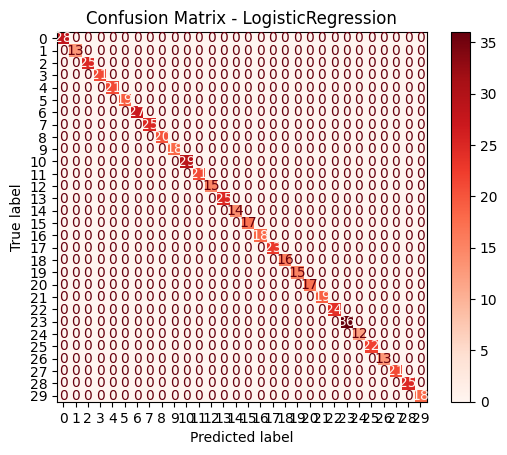


Seçilen Özellikler (20 adet):
- 21
- 345
- 429
- 433
- 488
- 633
- 746
- 946
- 1226
- 1322
- 1344
- 1945
- 1963
- 2145
- 2225
- 2518
- 2545
- 2629
- 2829
- 2913


C:\Users\defne\AppData\Local\Temp\ipykernel_34576\4282793477.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x="Importance", y="Feature", palette="mako")


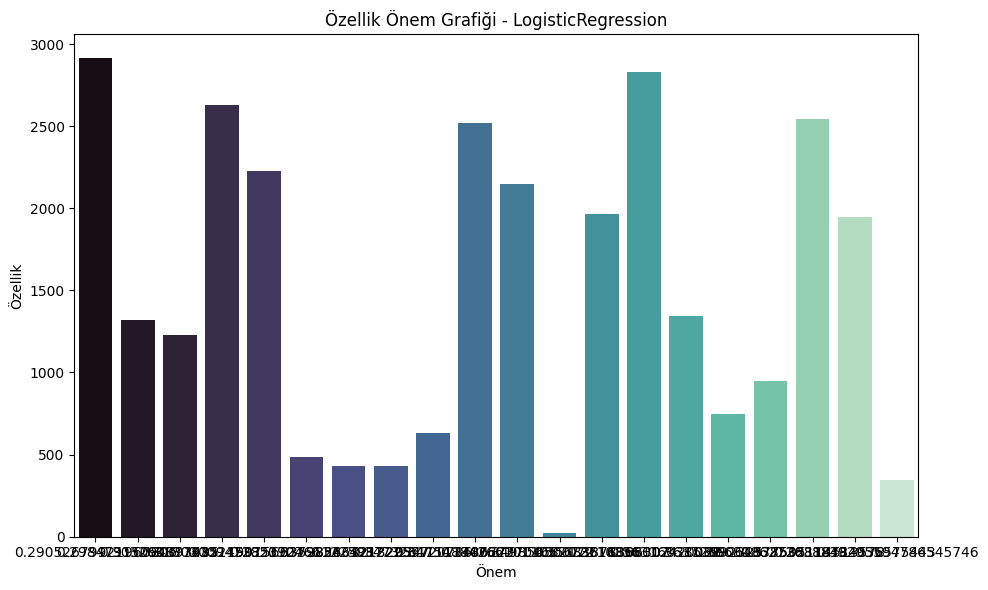

In [66]:
# USER ID için en iyi modeli seç
k = 20
best_model_info = get_best_model_info(user_k_results[k]["results"])
selected_mask = user_k_results[k]["selected_features"]
X_test = user_k_results[k]["X_test"]
y_test = user_k_results[k]["y_test"]

# USER ID için model sonuçlarını çiz
plot_model_results(best_model_info, X_test, y_test, selected_mask, X_scaled_df.columns)


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np

# RFE ile özellik seçimi yapıyoruz (base model olarak LogisticRegression kullanılıyor)
base_model = LogisticRegression(max_iter=5000, random_state=13)  # Base model
selector = RFE(estimator=base_model, n_features_to_select=k, step=1)
X_selected = selector.fit_transform(X_scaled_df, y_user_encoded)

# Cross-validation ile modeli değerlendiriyoruz
cv_scores = cross_val_score(best_model_info['model'], X_selected, y_user_encoded, cv=5, scoring='accuracy')

# Sonuçları yazdırıyoruz
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.4f}")


Cross-validation scores: [0.99757282 0.98783455 0.99756691 0.99270073 0.99513382]
Mean CV Score: 0.9942


En iyi modelin doğruluğu 1 geldiği için cross validation ile overfitting kontrolü yapılıyor ve modelin her veri için doğruluğunun 1 olduğunu overfitting olmadığını gözlemliyoruz.

Best model name: ExtraTrees
Best model accuracy: 0.7390599675850892
Best model params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


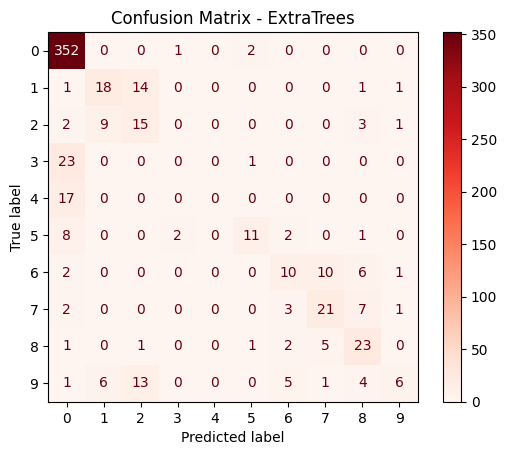


Seçilen Özellikler (20 adet):
- 253
- 851
- 1050
- 1251
- 1252
- 1813
- 1851
- 1862
- 1872
- 1873
- 2048
- 2249
- 2251
- 2449
- 2452
- 2455
- 2456
- 2655
- 2852
- 3074


C:\Users\defne\AppData\Local\Temp\ipykernel_34576\4282793477.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x="Importance", y="Feature", palette="mako")


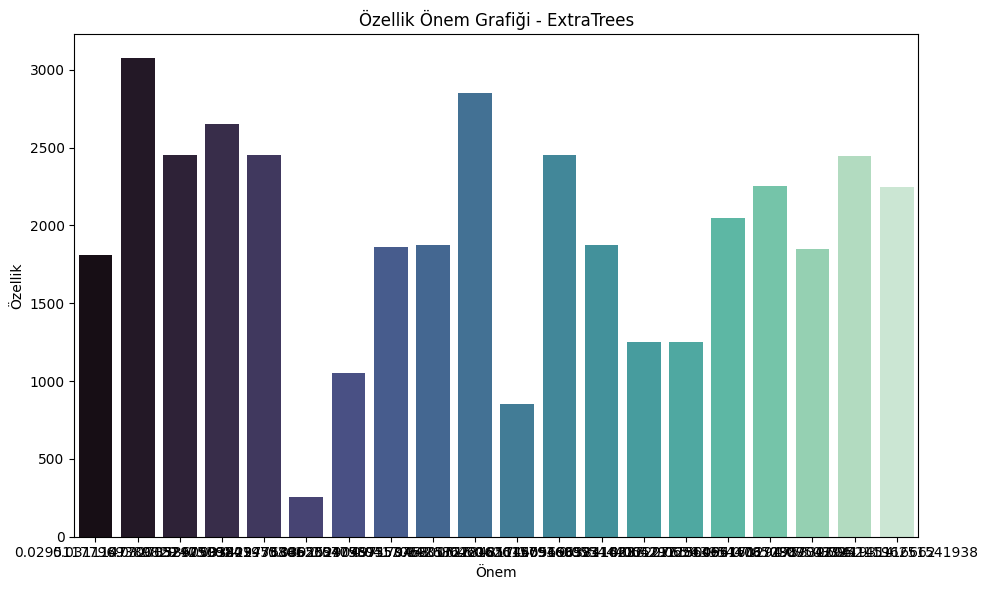

In [70]:
# Touch type için en iyi modeli seç
k = 20
best_model_info = get_best_model_info(touch_k_results[k]["results"])
selected_mask = touch_k_results[k]["selected_features"]
X_test = touch_k_results[k]["X_test"]
y_test = touch_k_results[k]["y_test"]
# Touch type için model sonuçlarını çiz
plot_model_results(best_model_info, X_test, y_test, selected_mask, X_scaled_df.columns)
